In [101]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import scipy.ndimage as nd
import skimage.measure
import sklearn.preprocessing as sk

In [102]:
def potentiel(A):
    res = 0
    for e in A:
        if e > 0:
            res += e
    return res

In [3]:
#%qtconsole

In [103]:
def display(images):
    fig = plt.figure(figsize=(100, 100))
    columns = len(images)
    rows = 1
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(images[i-1])
    plt.show()

In [215]:
def is_obstacle(img_num,seuil):
    frame_g = cv2.imread('data_montsouris_8/frame_g_{}.jpg'.format(img_num),0)
    frame_d = cv2.imread('data_montsouris_8/frame_d_{}.jpg'.format(img_num),0)
    stereo = cv2.StereoBM_create(numDisparities=64, blockSize=21)
    disparity = stereo.compute(frame_g,frame_d)
    plt.imshow(disparity)
    plt.show()
    M = disparity.max()
    for i in range(disparity.shape[0]):
        for j in range(disparity.shape[1]):
            if disparity[i,j]<0.99*M:
                disparity[i,j]=-16
    #disparity = skimage.measure.block_reduce(disparity, (3,3), np.min)
    plt.imshow(disparity)
    plt.show()

    weights = np.ones((50,1))
    d_convolved = nd.convolve(disparity, weights)
    plt.imshow(d_convolved)
    plt.show()
    
    weights_2 = np.ones((50,50))
    d_convolved_2 = nd.convolve(disparity,weights_2)
    plt.imshow(d_convolved_2)
    plt.show()
    d_pooled = skimage.measure.block_reduce(d_convolved, (480,1), np.max)
    d_pooled = sk.normalize(d_pooled)
    p = potentiel(d_pooled[0,:])
    d = np.repeat(d_pooled,100,axis=0)    
    if p > seuil:
        return (True,frame_d,disparity,d)
    else:
        return (False,frame_d,disparity,d)

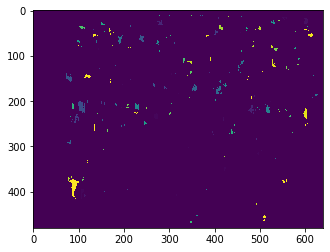

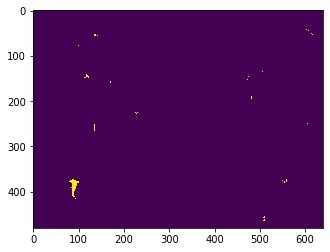

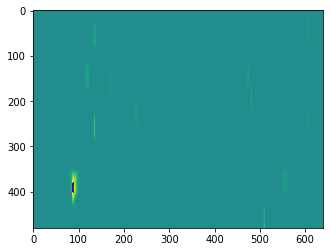

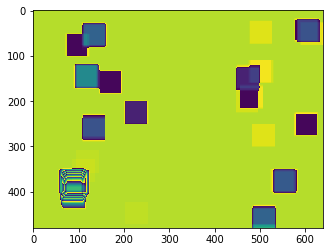

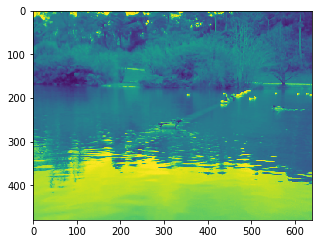

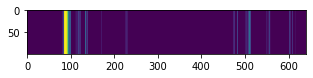

In [216]:
res = is_obstacle(25,4)
fig = plt.figure(figsize=(5, 5))
plt.imshow(res[1])
plt.show()
fig = plt.figure(figsize=(5, 5))
plt.imshow(res[3])
plt.show()

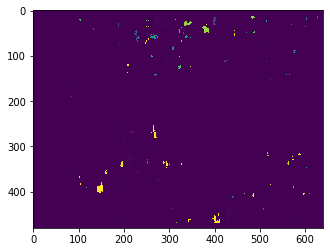

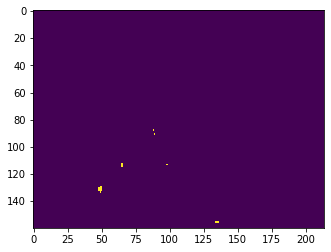

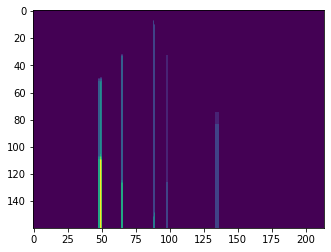

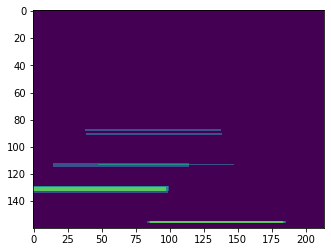

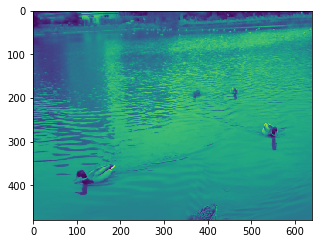

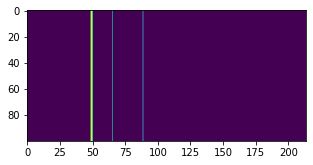

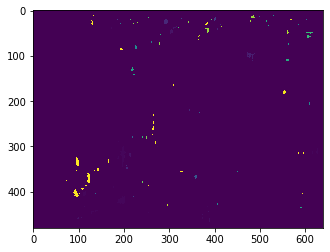

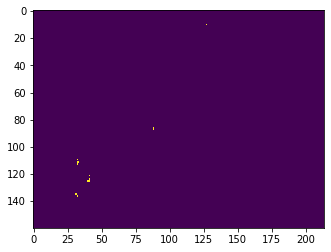

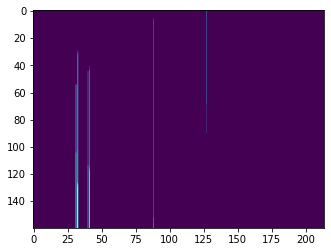

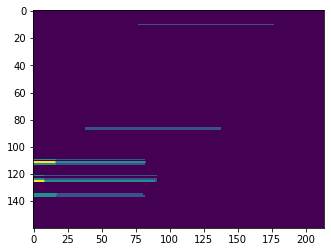

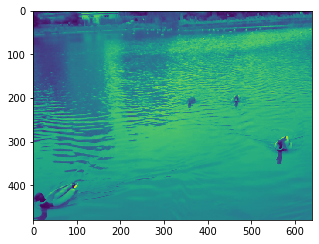

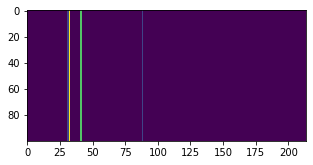

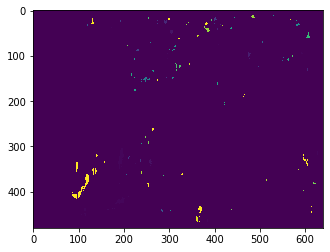

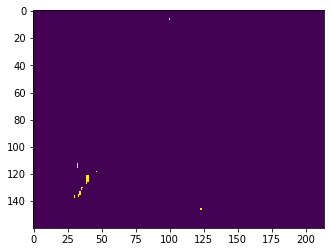

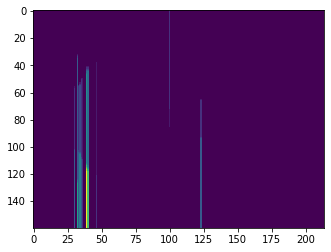

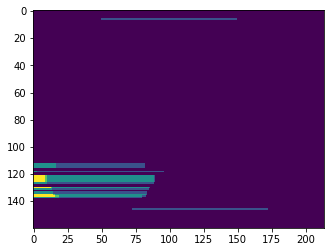

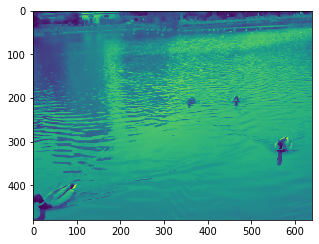

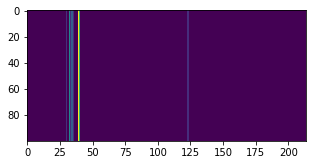

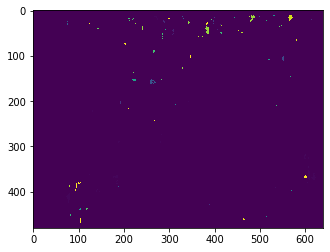

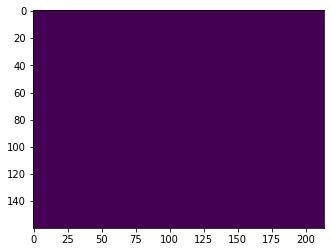

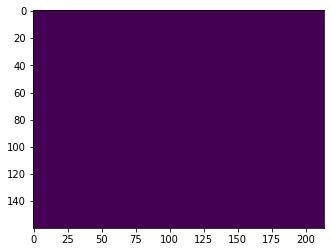

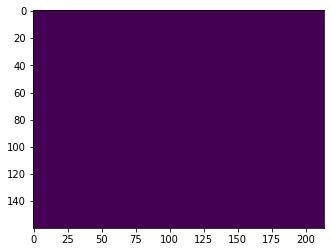

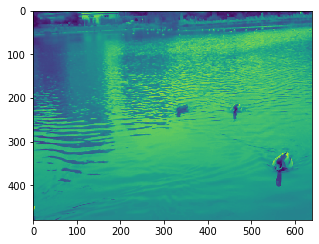

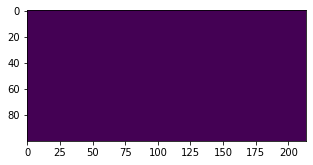

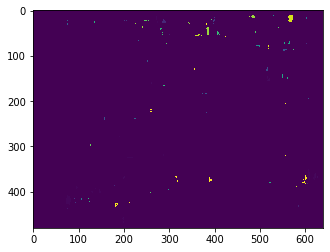

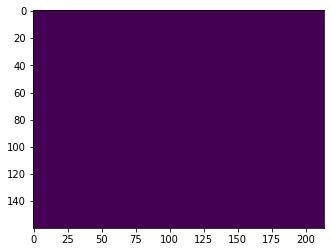

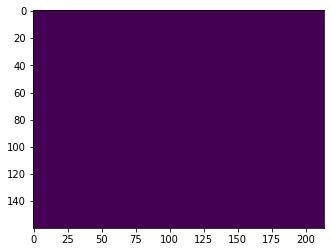

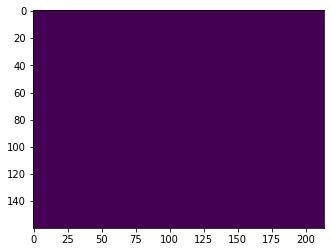

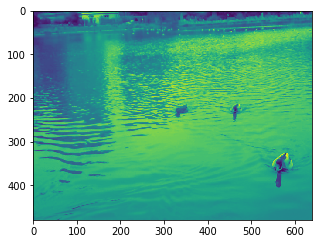

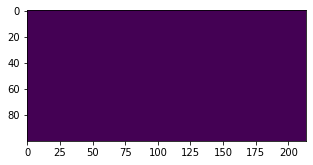

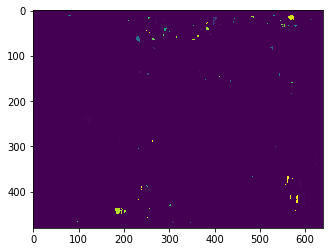

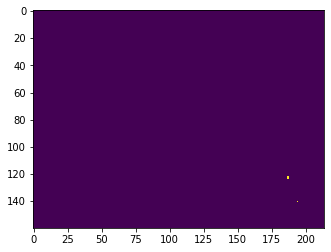

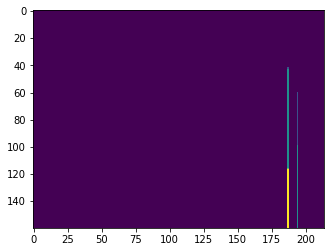

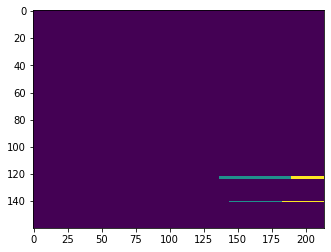

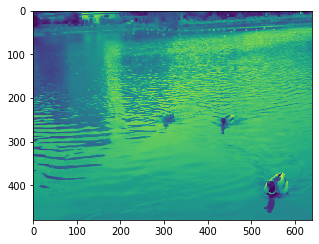

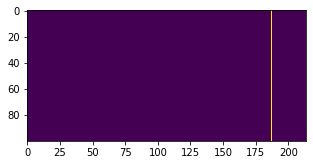

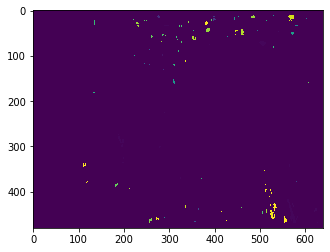

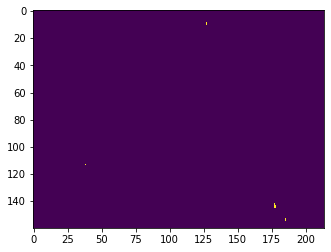

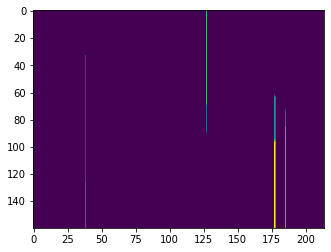

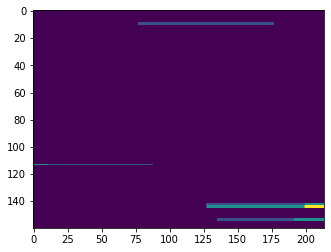

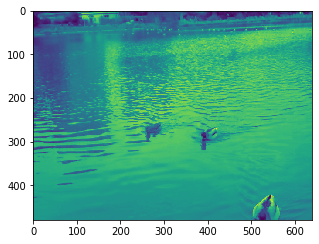

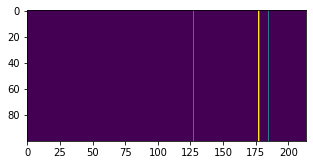

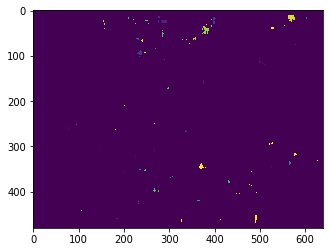

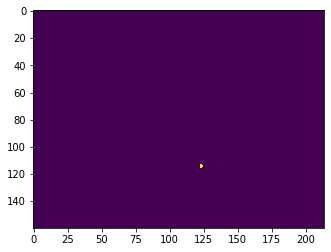

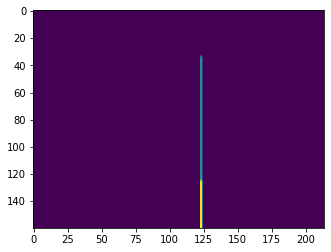

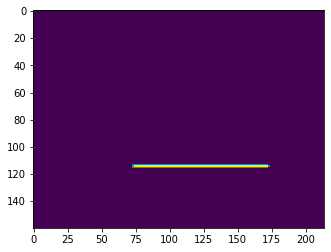

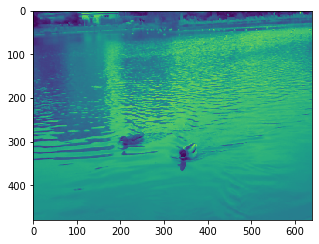

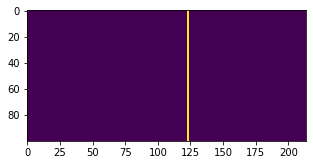

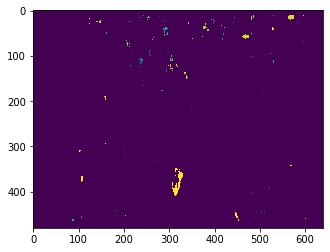

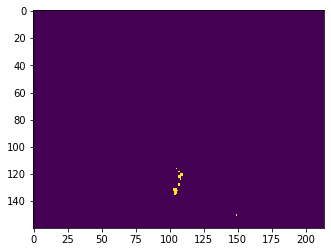

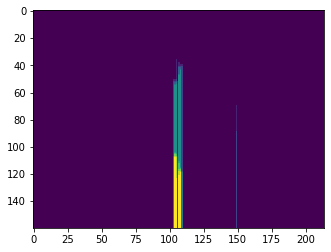

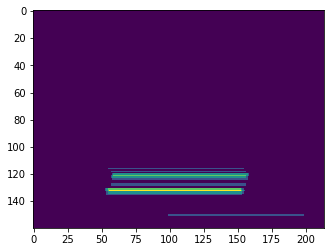

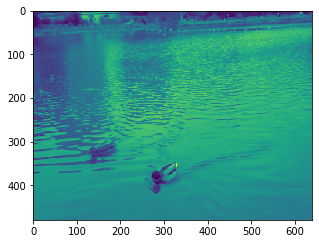

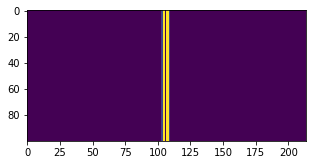

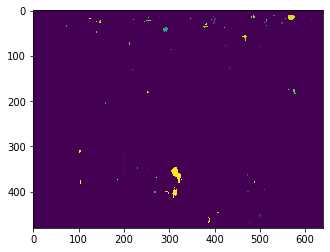

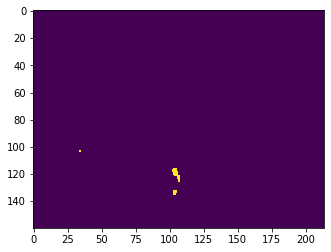

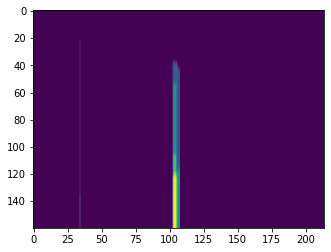

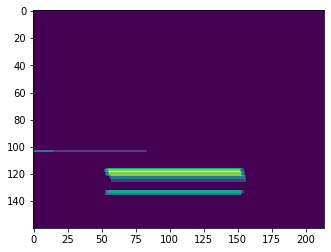

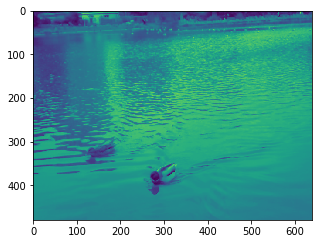

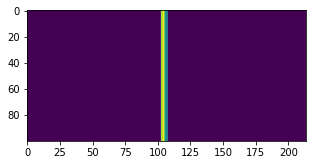

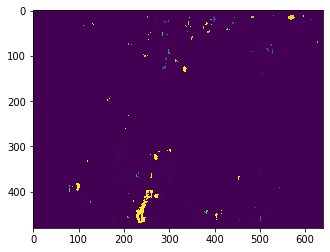

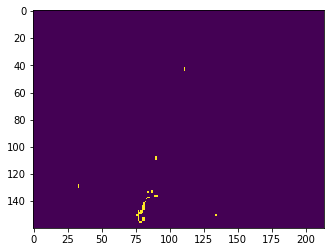

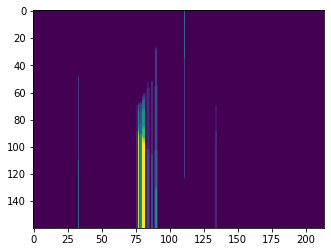

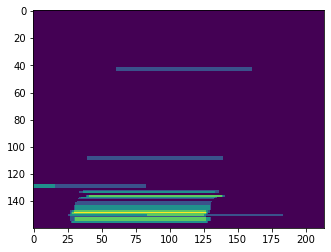

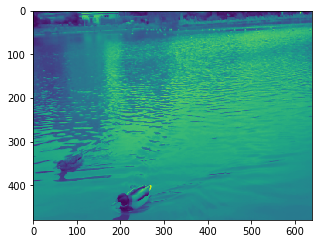

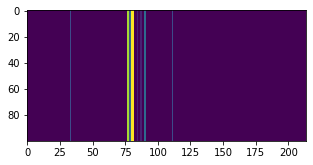

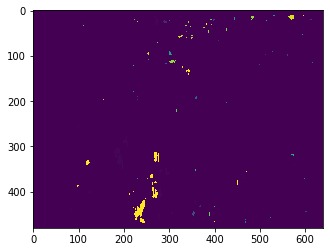

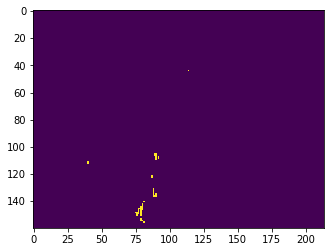

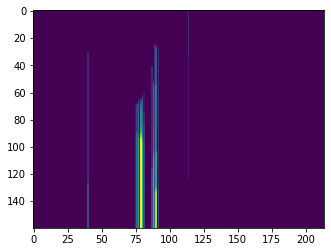

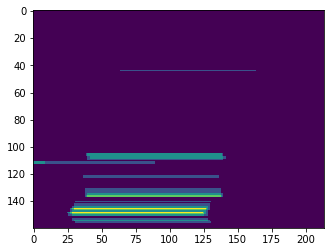

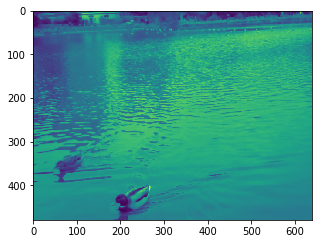

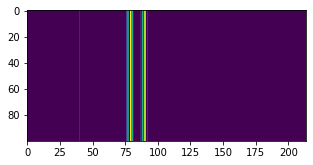

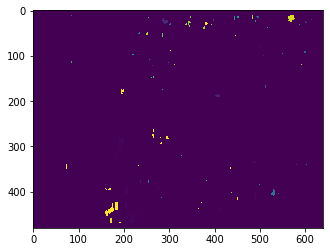

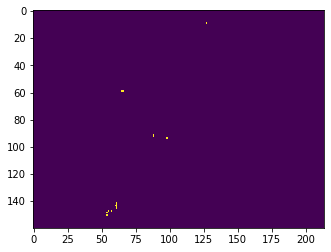

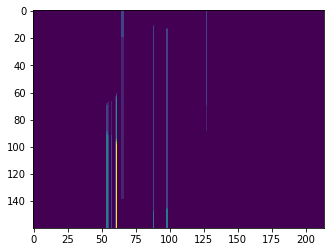

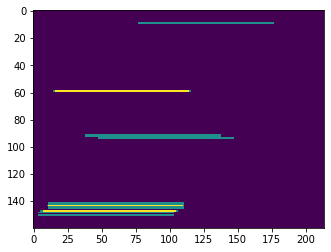

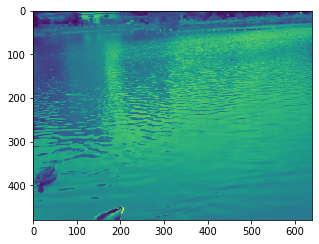

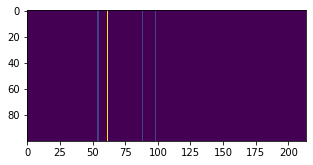

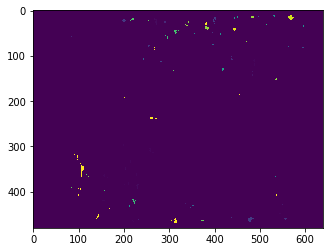

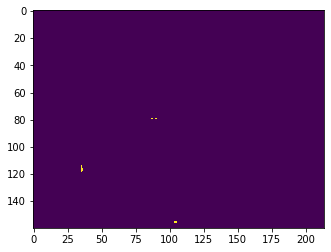

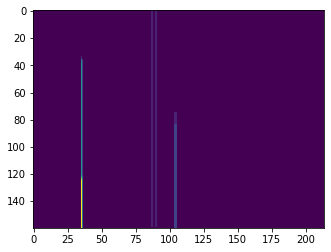

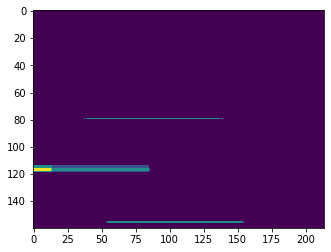

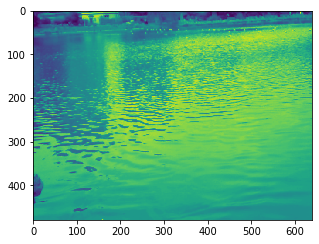

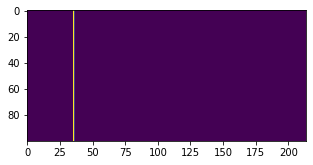

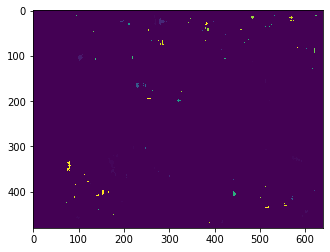

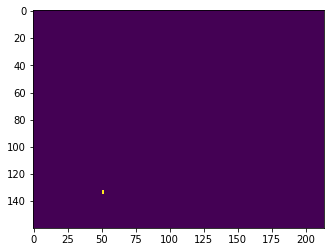

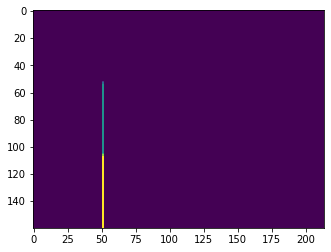

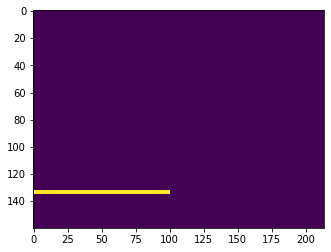

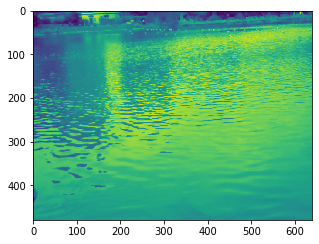

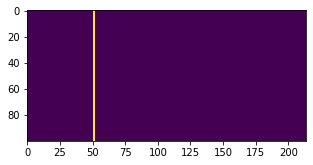

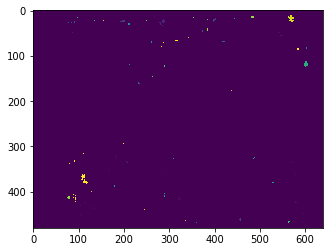

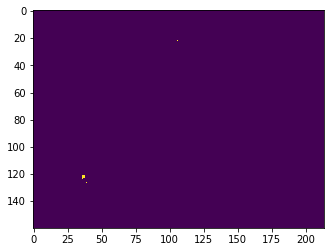

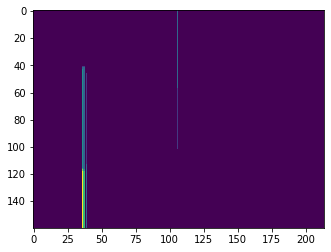

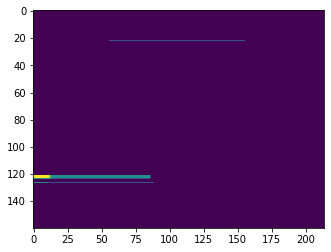

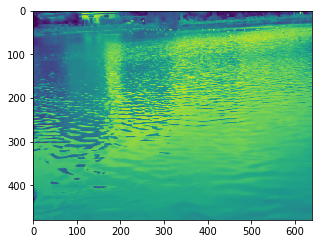

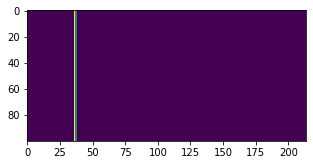

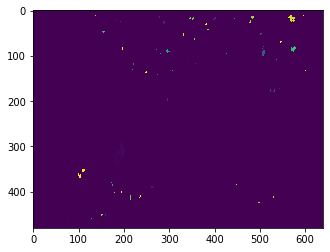

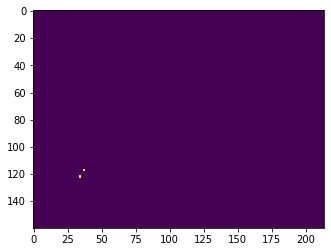

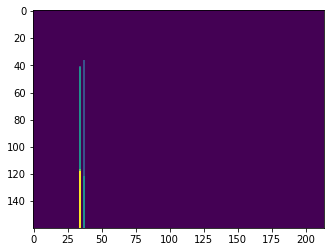

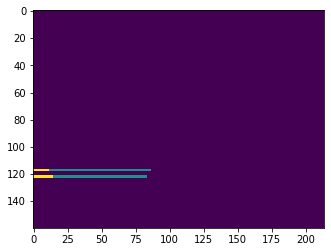

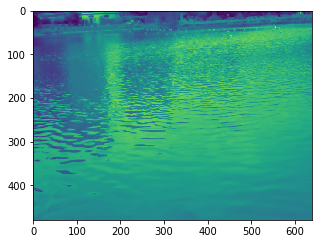

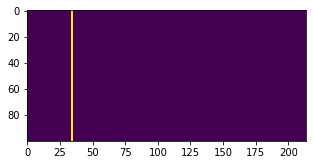

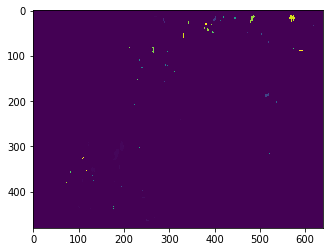

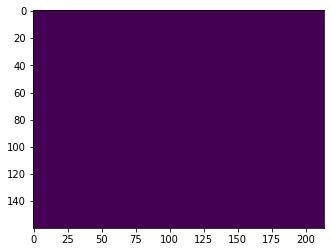

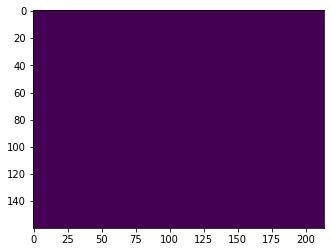

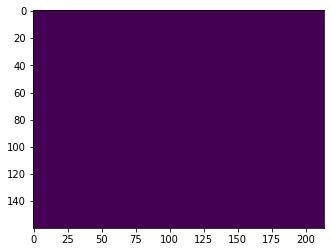

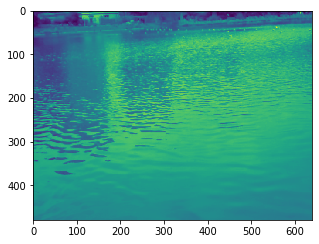

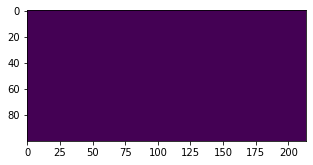

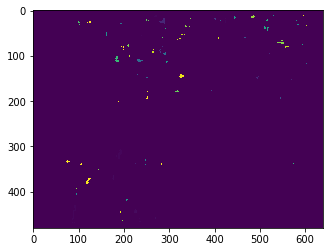

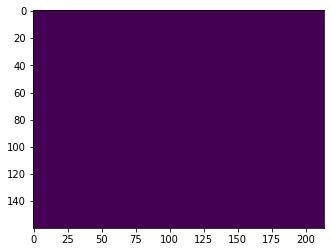

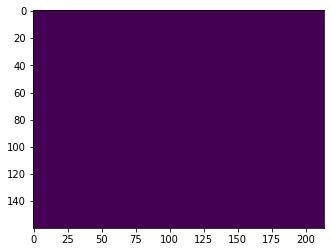

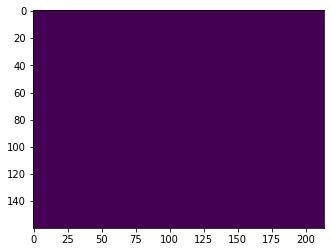

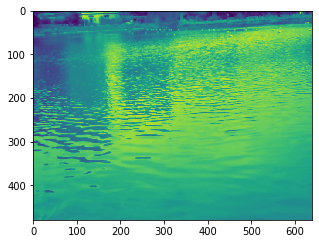

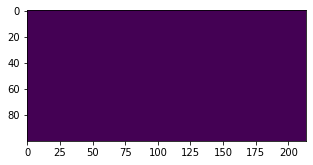

In [187]:
for i in range(1,20):
    res = is_obstacle(i,4)
    fig = plt.figure(figsize=(5, 5))
    plt.imshow(res[1])
    plt.show()
    fig = plt.figure(figsize=(5, 5))
    plt.imshow(res[3])
    plt.show()